In [1]:
!pip install git+https://github.com/FlorianSong/BagPype

DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/multiscale_centrality-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/pyrosetta-2024.1+release.00b79147e63-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Cloning https://github.com/FlorianSong/BagPype to /private/var/folders/14/twqld2_15bzd0mhlcxtnltmc0000gq/T/pip-req-build-6liuvzpt
  Running command git clone --filter=blob:none --quiet https://github.com/FlorianSong/BagPype /private/var/folders/14/twqld2_15bzd0mhlcxtnltmc0000gq/T/pip-req-build-6liuvzpt
  Resolved https://github.com/FlorianSong/BagPype to commit 52ab9df7f94ee64a057672a7c25135aeb159df2f
  Installing build dependencies ... done
  Getting requirements to build wheel ..

In [2]:
!pip install numpy==1.21.1

DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/multiscale_centrality-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/pyrosetta-2024.1+release.00b79147e63-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Using cached numpy-1.21.1.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1236 lines of output]
      setup.py:63: RuntimeWarning: NumPy 1.21.1 may not yet support Python 3.11.
        warnings.warn(
      Running from numpy source directory.
     

In [3]:
!pip install pandas==1.4.4

DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/multiscale_centrality-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/pyrosetta-2024.1+release.00b79147e63-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [4]:
!pip install pycifrw==4.4.5


DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/multiscale_centrality-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/pyrosetta-2024.1+release.00b79147e63-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [5]:
!pip install rpy2==3.4.5

DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/multiscale_centrality-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/pyrosetta-2024.1+release.00b79147e63-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [6]:
!pip install scipy==1.9.3

DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/multiscale_centrality-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/jrj20/anaconda3/lib/python3.11/site-packages/pyrosetta-2024.1+release.00b79147e63-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import signal
import scipy as sc

from Bio.PDB import PDBParser  
from collections import defaultdict
import urllib.request
import os
from pathlib import Path

if not Path("datasets").exists():
    os.mkdir("datasets")
if not Path("results").exists():
    os.mkdir("results")
    
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser

from multiscale_centrality import Multiscale_Centrality
from graph_generator import generate_graph
from matplotlib.colors import Normalize

In [3]:

import sys
sys.path.append(os.getcwd() + '/proteingraph-master')
sys.path.append(os.getcwd() + '/bagpype_master')

import bagpype
import proteingraph as pg
from pandas import DataFrame


 |‾|                Welcome to              
 | |__   __ _  __ _ _ __  _   _ _ __   ___  
 | '_ \ / _` |/ _` | '_ \| | | | '_ \ / _ \ 
 | |_) | (_| | (_| | |_) | |_| | |_) |  __/ 
 |_.__/ \__,_|\__, | .__/ \__, | .__/ \___| 
               __/ | |     __/ | |          
              |___/|_|    |___/|_|          
Biochemical, Atomistic Graph construction   
software in PYthon for Proteins, Etc.       
(C) Yaliraki group @ Imperial College London

"The inherent vice of capitalism is the unequal sharing of blessings; the inherent virtue of socialism is the equal sharing of miseries."
by Winston Churchill



In [5]:
#B2B code
def graph_construct(filename,res):

    myprot = bagpype.molecules.Protein()
    parser = bagpype.parsing.PDBParser(f'{filename}.pdb')
    parser.parse(myprot, strip = {'res_name': ['HOH']}, trim_H = True, add_H = True, MakeMultimer_number = None)
    ggenerator = bagpype.construction.Graph_constructor()
    ggenerator.construct_graph(myprot, atoms_file_name = f'{filename}_atoms.csv', 
                           bonds_file_name = f'{filename}_bonds.csv')

    source_residues = res
    
    return myprot 

def b2b(myprot, source_residues, filename):
    # proteingraph calculation Bond-to-Bond Propensity
    propensity_calcs = pg.bondbond.BondBond_run(myprot, source_residues)
    propensity_calcs.calculate_bond_propensities()
    propensity_calcs.calculate_bond_quantile_scores()
    propensity_calcs.calculate_test_set_bond_quantile_scores()
    propensity_calcs.bond_results_to_csv(f'{filename}_propensity_bond_results.csv')
    #propensity_calcs.plot_bond_propensities(f'{PDB}_propensity_bond_pp.pdf')

    propensity_calcs.calculate_residue_propensities()
    propensity_calcs.calculate_residue_quantile_scores()
    propensity_calcs.calculate_test_set_residue_quantile_scores()
    propensity_calcs.residue_results_to_csv(f'{filename}_propensity_residue_results.csv')
    #propensity_calcs.plot_residue_propensities(f'{PDB}_propensity_residue_pp.pdf')

In [6]:
def extract(filename):
    residue_file = f'{filename}_propensity_residue_results.csv' #opening file generated by b2b
    df = pd.read_csv(residue_file)  # creating dataframe from the csv file
    extracted_data = df.iloc[:, [0, 2, 6]] #getting relevant columns
    print(extracted_data)

    residue_array = extracted_data.to_numpy()
    selected_residues =[]
    res_numbers =[]
    res = "CYS" #amino acid selection - thsis can be changed depending on what amino acid you want to investigate
    for i in range(0,len(residue_array)):
        # check if it is a CYS and propensity >= 0.7
        if residue_array[i][1][0:3] == 'CYS' and residue_array[i][2] >= 0.7: #deciding which cysteines are eligible
            selected_residues.append(residue_array[i])#hold the selected ones in an array
    print(selected_residues)

    for i in range(0,len(selected_residues)):
        j = (str(selected_residues[i][0]), str(selected_residues[i][1][-1])) #getting just the residue number and adding them to an array
        res_numbers.append(j)
    print(res_numbers)
    return res_numbers, selected_residues


In [5]:
def coupling_check(filename,res_list,i):
    #this runs the b2b code for each residue that is taken as a source node
    # filename will be the pdb file
    coupling_graph = graph_construct(filename,[res_list[i]])
    propensity_calcs = pg.bondbond.BondBond_run(coupling_graph,[res_list[i]])
    propensity_calcs.calculate_bond_propensities()
    propensity_calcs.calculate_bond_quantile_scores()
    propensity_calcs.calculate_test_set_bond_quantile_scores()
    propensity_calcs.bond_results_to_csv(f'{filename+res_list[i][0]}_propensity_bond_results.csv')
    #propensity_calcs.plot_bond_propensities(f'{PDB}_propensity_bond_pp.pdf')

    propensity_calcs.calculate_residue_propensities()
    propensity_calcs.calculate_residue_quantile_scores()
    propensity_calcs.calculate_test_set_residue_quantile_scores()
    propensity_calcs.residue_results_to_csv(f'{filename+res_list[i][0]}_propensity_residue_results.csv')
    #propensity_calcs.plot_residue_propensities(f'{PDB}_propensity_residue_pp.pdf')
    
  
        
        

In [6]:
def update_couple_df(couple_df, origin_source, res_num, res_scores):
    # data frame to store updated coupling info
    new_df = pd.DataFrame({'Origin Source': [origin_source[0]] * len(res_num),
                           'Coupled Residue': [res[0] for res in res_num],
                           'Score': [score[2] for score in res_scores]})
    couple_df = pd.concat([couple_df, new_df], ignore_index=True)
    return couple_df

    #for back coupling inforation to be stored
def update_couple_back_df(couple_back_df, origin_source, res_c, score_c):
    new_df = pd.DataFrame({'Origin Source': [res[0] for res in res_c],
                           'Coupled Residue': [origin_source[0]] * len(res_c),
                           'Score': [score[2] for score in score_c]})
    couple_back_df = pd.concat([couple_back_df, new_df], ignore_index=True)
    return couple_back_df

In [8]:
def coupling_analysis(file, origin_sources):
    couple_df = pd.DataFrame(columns=['Origin Source', 'Coupled Residue', 'Score'])
    couple_back_df = pd.DataFrame(columns=['Origin Source', 'Coupled Residue', 'Score'])
    processed_residues = set()

    for origin_source in origin_sources:
        # Primary coupling
        primary_graph = graph_construct(file, [origin_source]) #creating the protein graph
        b2b(primary_graph, [origin_source], file) #getting propensity values
        res_num, res_scores = extract(file) #getting residues that couple and their score 
        couple_df = update_couple_df(couple_df, origin_source, res_num, res_scores) # putting the residues all into a dataframe

        # Check coupling back
        if res_num:
            coupling_check(file, res_num, 0) #running each of the residues that couples back as a source node to see 
            res_c, score_c = extract(file) # getting the coupling score back - if >= they will be accpeted
            couple_back_df = update_couple_back_df(couple_back_df, origin_source, res_c, score_c)
            processed_residues.update([res[0] for res in res_num])

    if not processed_residues:  # If no residues were processed
        res_num = [(0, 'A')]  # Add a placeholder element
        coupling_check(file, res_num, 0)
        res_c, score_c = extract(file)
        couple_back_df = update_couple_back_df(couple_back_df, origin_sources[0], res_c, score_c)

    for origin_source in processed_residues:
        # Skip residues that have already been processed
        continue

    for origin_source in list(processed_residues):
        # Secondary coupling - same steps as before
        secondary_graph = graph_construct(file, [(origin_source, 'A')])  # Assuming chain 'A'
        b2b(secondary_graph, [(origin_source, 'A')], file)
        res_num, res_scores = extract(file)
        couple_df = update_couple_df(couple_df, (origin_source, 'A'), res_num, res_scores)

        # Check coupling back
        if res_num:
            coupling_check(file, res_num, 0)
            res_c, score_c = extract(file)
            couple_back_df = update_couple_back_df(couple_back_df, (origin_source, 'A'), res_c, score_c)
            processed_residues.update([res[0] for res in res_num])

            for origin_source_secondary in list(processed_residues):
                # Skip residues that have already been processed
                continue

                # Tertiary coupling - same steps as before
                tertiary_graph = graph_construct(file, [(origin_source_secondary, 'A')])  # Assuming chain 'A'
                b2b(tertiary_graph, [(origin_source_secondary, 'A')], file)
                res_num, res_scores = extract(file)
                couple_df = update_couple_df(couple_df, (origin_source_secondary, 'A'), res_num, res_scores)

                # Check coupling back
                if res_num:
                    coupling_check(file, res_num, 0)
                    res_c, score_c = extract(file)
                    couple_back_df = update_couple_back_df(couple_back_df, (origin_source_secondary, 'A'), res_c, score_c)
                    processed_residues.update([res[0] for res in res_num])

    return couple_df, couple_back_df


In [9]:
def network_extraction(origin_sources, file):

    # Run the coupling analysis and get back the dataframe the results
    result_couple_df, result_couple_back_df = coupling_analysis(file, origin_sources)

    # Save the final results to CSV files
    result_couple_df.to_csv(f'{file}_coupling_results.csv', index=False)
    result_couple_back_df.to_csv(f'{file}_coupling_back_results.csv', index=False) # one that is used later on as backwards coupling is checked


In [11]:

import networkx as nx

def graph_loading(file_name):
    file_path_edges = f'/Users/jrj20/Documents/Data/{file_name}_coupling_results.csv' #load from file path
    data = pd.read_csv(file_path_edges)
    
    # remove rows where 'Origin Source' and 'Coupled Residue' values are the same
    data = data[data['Origin Source'] != data['Coupled Residue']]
    
    # remove duplicate edges and interactions
    data = data.drop_duplicates(subset=['Origin Source', 'Coupled Residue'])
    
    # extract unique edges and their weights
    edges_with_weights = {(row['Origin Source'], row['Coupled Residue']): row['Score'] for _, row in data.iterrows()}

    # constructing a graph from edge information
    g = nx.Graph()
    for edge, weight in edges_with_weights.items():
        g.add_edge(edge[0], edge[1], weight=weight)

    # create a directed graph and add edges based on the provided data
    dg = nx.DiGraph()
    for _, row in data.iterrows():
        dg.add_edge(row['Origin Source'], row['Coupled Residue'], weight=row['Score'])
        
    return dg, g


In [7]:
def adding_coord(file,dg,g):
    nodes_list = list(g.nodes)

    # path to PDB
    pdb_file_path = f'/Users/jrj20/Documents/Data/{file}.pdb'
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('structure', pdb_file_path)

    residue_numbers = []
    average_coordinates_list = []
    for model in structure:
        for chain in model:
            for residue in chain:
                # get residue number
                residue_number = residue.id[1]

                # check if the residue number is in the nodes_list
                if residue_number in nodes_list:

                    #put coordinates into array
                    residue_coords = []

                    # iterate through atoms in the residue and store coordinates
                    for atom in residue:
                        if atom.name == 'CA':  # considering the alpha carbon atom, change as needed
                            residue_coords.append(atom.coord)

                    # calculate the average coordinates for the current residue
                    if residue_coords:
                        average_coords = np.mean(residue_coords, axis=0)

                        # append data to lists
                        residue_numbers.append(residue_number)
                        average_coordinates_list.append(average_coords)


    average_coordinates_array = np.array(average_coordinates_list) # add the averaged out coordinate of the residue to an array
    data = pd.DataFrame({'Residue': residue_numbers, 'X': average_coordinates_array[:, 0], 'Y': average_coordinates_array[:, 1], 'Z': average_coordinates_array[:, 2]})

    # save coordinate file, first row residues second row coordinates in x,y,z
    output_csv_path = f'/Users/jrj20/Documents/Data/{file}coord.txt'
    data.to_csv(output_csv_path, index=False)
    print(f"Data saved to {output_csv_path}")
    
     # read from csv file and create a dictionary of coordinates with node names
    file_path_coords = f'/Users/jrj20/Documents/Data/{file}coord.txt'
    node_coords = pd.read_csv(file_path_coords, delimiter=',')
    node_coord_dict = dict(zip(node_coords['Residue'], zip(node_coords['X'], node_coords['Y'], node_coords['Z'])))

    # Add coordinates as properties to the nodes in the graph
    for node in dg.nodes():
        if node in node_coord_dict:
            coords = node_coord_dict[node]
            nx.set_node_attributes(dg, {node: {'x': coords[0], 'y': coords[1], 'z': coords[2]}})

    
    return dg, g,nodes_list

In [8]:
def directed_graph_generator(dg,g,name,highlight_nodes):
    # make dictionary from node coordinates for 2D plot
    pos_2d = {node: (attrs['x'], attrs['y']) for node, attrs in dg.nodes(data=True)}

    # extract edges and weights for directed graph
    edges_dg = dg.edges(data=True)
    weights_dg = [data['weight'] for _, _, data in edges_dg]
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(dg, pos_2d, node_size=100)

    # code to draw the graph with arrows on the edges
    for (u, v, data) in edges_dg:
        x1, y1 = pos_2d[u]
        x2, y2 = pos_2d[v]
        nx.draw_networkx_edges(dg, pos_2d, edgelist=[(u, v)], width=data['weight'], arrows=True, arrowsize=10, connectionstyle=f'arc3,rad=0.1')

    node_size = 100 
    # code to highlight certain nodes - users choice
    for node in highlight_nodes:
        if node in pos_2d:
            nx.draw_networkx_nodes(g, pos_2d, nodelist=[node], node_size=node_size, node_color='red') 

    nx.draw_networkx_labels(dg, pos_2d, font_size=10, font_color='black')
    plt.title(f"Directed Graph Visualisation of {name}")
    plt.axis('off')
    plt.savefig(f"{name}_directed_graph.png")


    return pos_2d

In [9]:
def directed_graph_w_weights(dg,g,name,highlight_nodes):
    # creating dictionary like before
    pos_2d = {node: (attrs['x'], attrs['y']) for node, attrs in dg.nodes(data=True)}

    # extract edges and weights for directed graph
    edges_dg = dg.edges(data=True)
    weights_dg = [data['weight'] for _, _, data in edges_dg]
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(dg, pos_2d, node_size=100)

    norm = Normalize(vmin=min(weights_dg), vmax=max(weights_dg))

    # code to draw graph with arrows on the edges and colour based on weight
    for (u, v, data) in edges_dg:
        x1, y1 = pos_2d[u]
        x2, y2 = pos_2d[v]
        norm_weight = norm(data['weight'])
        nx.draw_networkx_edges(dg, pos_2d, edgelist=[(u, v)], width=data['weight'], edge_color=plt.cm.viridis(norm_weight), arrows=True, arrowsize=10, connectionstyle='arc3,rad=0.1')
    node_size = 100 
    for node in highlight_nodes:
        if node in pos_2d:
            nx.draw_networkx_nodes(dg, pos_2d, nodelist=[node], node_size=node_size, node_color='red')  


    nx.draw_networkx_labels(dg, pos_2d, font_size=10, font_color='black')
    plt.title(f"Weighted Directed Graph Visualisation of {name}")
    plt.axis('off')  
    plt.savefig(f"{name}_directed_graph_w_weights.png")
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Edge Weight')



In [19]:

def multiscale_analysis(dg, file, g, nodes_list, pos_2d, name):
    laplacian_matrix = nx.directed_combinatorial_laplacian_matrix(dg)
    laplacian_array = np.array(laplacian_matrix)
    
    normalization_tpe = 'combinatorial'  # type of normalization, combinatorial or normalized
    rw_tpe = 'continuous'  
    t_min = -1.5  # maximum time (in spectral gap units)
    t_max = 0.5    # maximum time (in spectral gap units)
    n_t = 1000  
 
    file_path_coords = f'/Users/jrj20/Documents/Data/{file}coord.txt'
    node_coords = pd.read_csv(file_path_coords, delimiter=',')

    # remove rows where the first and second column values are the same
    node_coords = node_coords[~(node_coords['Residue'] == node_coords['X'])]
    
    # dictionary of coordinates with node names as keys
    node_coord_dict = dict(zip(node_coords['Residue'], zip(node_coords['X'], node_coords['Y'], node_coords['Z'])))

    # adding coordinates as properties of the graph
    for node in g.nodes():
        if node in node_coord_dict:
            coords = node_coord_dict[node]
            nx.set_node_attributes(dg, {node: {'x': coords[0], 'y': coords[1], 'z': coords[2]}})


    # nodes are converted to integers from 0 and beyond so that MSC code can handle it - they can be recovered later
    g = nx.convert_node_labels_to_integers(g, first_label=0, ordering='default')
    dg = nx.convert_node_labels_to_integers(dg, first_label=0, ordering='default')

    # positions computed
    pos_3d = {node: (attrs['x'], attrs['y'], attrs['z']) for node, attrs in dg.nodes(data=True)}

    # code generated by Barahona Research Group
    
    mc = Multiscale_Centrality(dg, pos_2d, t_min=t_min, t_max=t_max, n_t=n_t, normalization_tpe=normalization_tpe, rw_tpe=rw_tpe)
    mc.figsize = (6, 3)
    mc.compute_multiscale_centralities()
    
    mc.figsize = (6, 3)
    mc.plot_trajectories(name)

    #MSC spearman correlation
    mc.compare_centralities(n_compare=n_t, n_top=2, n_force=100)
    mc.figsize = (6, 3)
    mc.plot_comparisons_spearman(name)
    

    # create a dictionary mapping original labels to numerical labels and add the coords - this is how they are recovered
    original_labels = {i: node for i, node in enumerate(nodes_list)}
    pos_2d = {node: (coords[0], coords[1]) for node, coords in pos_3d.items()}

    # setting up graph construction
    figsize = (10, 8)  # Set your desired figure size here
    fig, ax = plt.subplots(figsize=figsize)
    nx.draw(dg, ax=ax, node_color=mc.multiscale[:, 0], node_size=50, with_labels=True, labels=original_labels, pos=pos_2d,
            alpha=0.8, edge_color='gray', arrows=True)

    #MSC graph at small scale
    plt.title("Small Scale")
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, label='Multiscale Centrality')
    cbar.ax.tick_params(labelsize=8)  # Set font size for colorbar labels
    plt.savefig(f'{file}_small_scale_graph.png')
    plt.show()
    fig, ax = plt.subplots(figsize=figsize)
    nx.draw(dg, ax=ax, node_color=mc.multiscale[:, 400], node_size=50, with_labels=True, labels=original_labels,
            pos=pos_2d,
            alpha=0.8, edge_color='gray', arrows=True)

    #MSC graph at middle scale
    plt.title("Middle Scale")
    cbar = plt.colorbar(sm, ax=ax, label='Multiscale Centrality')
    cbar.ax.tick_params(labelsize=8)  # Set font size for colorbar labels
    plt.savefig(f'{file}_middle_scale_graph.png')
    plt.show()
    fig, ax = plt.subplots(figsize=figsize)
    nx.draw(dg, ax=ax, node_color=mc.multiscale[:, 900], node_size=50, with_labels=True, labels=original_labels,
            pos=pos_2d,
            alpha=0.8, edge_color='gray', arrows=True)

    #MSC graph at large scale
    plt.title("Large Scale")
    cbar = plt.colorbar(sm, ax=ax, label='Multiscale Centrality')
    cbar.ax.tick_params(labelsize=8)  # Set font size for colorbar labels
    plt.savefig(f'{file}_large_scale_graph.png')
    plt.show()


In [22]:
def process_file(origin_sources, file_name, name, highlight_nodes):
    network_extraction(origin_sources, file_name) #getting network from original source and pdb
    dg, g = graph_loading(file_name)#saving the generated graphs 
    dg, g, nodes_list = adding_coord(file_name, dg, g) # making the coordinates attributes of the nodes

    pos_2d = directed_graph_generator(dg, g, name, highlight_nodes) 
    directed_graph_w_weights(dg, g, name, highlight_nodes)# graph being printed
    multiscale_analysis(dg, file_name, g, nodes_list, pos_2d, name) #MSC


def process_files_in_folder(folder_path, file_name_dict, origin_sources, highlight_nodes):
    for file_name, name in file_name_dict.items(): # going through each file in the dictionary
        file_path = os.path.join(folder_path, file_name)  # constructing file path
        process_file(origin_sources, file_path, name, highlight_nodes) #now processing the file 
        
origin_sources = [('115', 'A'),('296', 'A'),('272', 'A')] #add in original source residues
highlight_nodes = [115,296,272] #add in what nodes are to be highlighted

# dictionary mapping file names to corresponding names - so multiple files can be put through
# for all the files that are listed the same origin sources written above will be used 
file_name_dict = {
    'calpain1_opt': 'Calpain 1',
   
}

folder_path =""

Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_opt_stripped_H.pdb

Graph construction started
Initialising all possible bonds, memory efficiently...
Initialising covalent bond energies for ALA, ARG, ASN, ASP, CYS, GLN, GLU, GLY, HIS, ILE, LEU, LYS, MET, PHE, PRO, SER, THR, TRP, TYR, VAL
Finding covalent bonds...
Finding hydrogen bonds at cutoff = -0.01kcal/mol...
    Assigning H-bond status...
    Applying constraints and computing bond strengths...
    Total energy of hydrogen bonds and salt bridges: -2965.52 kcal/mol
Finding hydrophobics...


/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.61s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.202899
709      711     THR711 A  0.072464
710      712     MET712 A  0.115942
711      713     PHE713 A  0.405797
712      714     ALA714 A  0.072464

[713 rows x 3 columns]
[array([250, 'CYS250 A', 0.9710144928], dtype=object), array([351, 'CYS351 A', 0.8260869565], dtype=object), array([417, 'CYS417 A', 0.9275362319], dtype=object), array([678, 'CYS678 A', 0.9565217391], dtype=object)]
[('250', 'A'), ('351', 'A'), ('417', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_opt_stripped_H.pdb

Graph construction started
Initialising all pos

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.51s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.202899
709      711     THR711 A  0.072464
710      712     MET712 A  0.115942
711      713     PHE713 A  0.405797
712      714     ALA714 A  0.072464

[713 rows x 3 columns]
[array([250, 'CYS250 A', 0.9710144928], dtype=object), array([351, 'CYS351 A', 0.8260869565], dtype=object), array([417, 'CYS417 A', 0.9275362319], dtype=object), array([678, 'CYS678 A', 0.9565217391], dtype=object)]
[('250', 'A'), ('351', 'A'), ('417', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_opt_stripped_H.pdb

Graph construction started
Initialising all pos

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.56s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.202899
709      711     THR711 A  0.086957
710      712     MET712 A  0.144928
711      713     PHE713 A  0.362319
712      714     ALA714 A  0.086957

[713 rows x 3 columns]
[array([115, 'CYS115 A', 0.8695652174], dtype=object), array([250, 'CYS250 A', 1.0], dtype=object), array([677, 'CYS677 A', 0.8115942029], dtype=object), array([678, 'CYS678 A', 1.0], dtype=object)]
[('115', 'A'), ('250', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_opt_stripped_H.pdb

Graph construction started
Initialising all possible bonds, memor

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.79s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.202899
709      711     THR711 A  0.086957
710      712     MET712 A  0.144928
711      713     PHE713 A  0.362319
712      714     ALA714 A  0.086957

[713 rows x 3 columns]
[array([115, 'CYS115 A', 0.8695652174], dtype=object), array([250, 'CYS250 A', 1.0], dtype=object), array([677, 'CYS677 A', 0.8115942029], dtype=object), array([678, 'CYS678 A', 1.0], dtype=object)]
[('115', 'A'), ('250', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_opt_stripped_H.pdb

Graph construction started
Initialising all possible bonds, memor

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.69s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.231884
709      711     THR711 A  0.101449
710      712     MET712 A  0.130435
711      713     PHE713 A  0.463768
712      714     ALA714 A  0.086957

[713 rows x 3 columns]
[array([115, 'CYS115 A', 0.9420289855], dtype=object), array([250, 'CYS250 A', 0.9855072464], dtype=object), array([417, 'CYS417 A', 0.768115942], dtype=object), array([677, 'CYS677 A', 0.7391304348], dtype=object), array([678, 'CYS678 A', 0.9710144928], dtype=object)]
[('115', 'A'), ('250', 'A'), ('417', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.86s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.231884
709      711     THR711 A  0.101449
710      712     MET712 A  0.130435
711      713     PHE713 A  0.463768
712      714     ALA714 A  0.086957

[713 rows x 3 columns]
[array([115, 'CYS115 A', 0.9420289855], dtype=object), array([250, 'CYS250 A', 0.9855072464], dtype=object), array([417, 'CYS417 A', 0.768115942], dtype=object), array([677, 'CYS677 A', 0.7391304348], dtype=object), array([678, 'CYS678 A', 0.9710144928], dtype=object)]
[('115', 'A'), ('250', 'A'), ('417', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.80s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.000000
..       ...          ...       ...
708      710     LEU710 A  0.217391
709      711     THR711 A  0.086957
710      712     MET712 A  0.188406
711      713     PHE713 A  0.449275
712      714     ALA714 A  0.101449

[713 rows x 3 columns]
[array([108, 'CYS108 A', 0.8985507246], dtype=object), array([115, 'CYS115 A', 0.8405797101], dtype=object), array([250, 'CYS250 A', 0.8115942029], dtype=object), array([384, 'CYS384 A', 0.7826086957], dtype=object), array([677, 'CYS677 A', 0.7826086957], dtype=object), array([678, 'CYS678 A', 0.9565217391], dtype=object)]
[('108', 'A'), ('115', 'A'), ('250', 'A'), ('384', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished ad

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.72s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.000000
..       ...          ...       ...
708      710     LEU710 A  0.217391
709      711     THR711 A  0.086957
710      712     MET712 A  0.188406
711      713     PHE713 A  0.449275
712      714     ALA714 A  0.101449

[713 rows x 3 columns]
[array([108, 'CYS108 A', 0.8985507246], dtype=object), array([115, 'CYS115 A', 0.8405797101], dtype=object), array([250, 'CYS250 A', 0.8115942029], dtype=object), array([384, 'CYS384 A', 0.7826086957], dtype=object), array([677, 'CYS677 A', 0.7826086957], dtype=object), array([678, 'CYS678 A', 0.9565217391], dtype=object)]
[('108', 'A'), ('115', 'A'), ('250', 'A'), ('384', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished ad

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.96s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.260870
709      711     THR711 A  0.101449
710      712     MET712 A  0.130435
711      713     PHE713 A  0.579710
712      714     ALA714 A  0.115942

[713 rows x 3 columns]
[array([108, 'CYS108 A', 0.9420289855], dtype=object), array([250, 'CYS250 A', 0.884057971], dtype=object), array([417, 'CYS417 A', 0.8985507246], dtype=object), array([678, 'CYS678 A', 1.0], dtype=object)]
[('108', 'A'), ('250', 'A'), ('417', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_opt_stripped_H.pdb

Graph construction started
Initialising all possible bond

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.65s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.260870
709      711     THR711 A  0.101449
710      712     MET712 A  0.130435
711      713     PHE713 A  0.579710
712      714     ALA714 A  0.115942

[713 rows x 3 columns]
[array([108, 'CYS108 A', 0.9420289855], dtype=object), array([250, 'CYS250 A', 0.884057971], dtype=object), array([417, 'CYS417 A', 0.8985507246], dtype=object), array([678, 'CYS678 A', 1.0], dtype=object)]
[('108', 'A'), ('250', 'A'), ('417', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_opt_stripped_H.pdb

Graph construction started
Initialising all possible bond

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.63s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.014493
3          5       ILE5 A  0.014493
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.173913
709      711     THR711 A  0.072464
710      712     MET712 A  0.086957
711      713     PHE713 A  0.362319
712      714     ALA714 A  0.101449

[713 rows x 3 columns]
[array([108, 'CYS108 A', 0.9710144928], dtype=object), array([250, 'CYS250 A', 0.8550724638], dtype=object), array([384, 'CYS384 A', 0.7971014493], dtype=object), array([417, 'CYS417 A', 0.8985507246], dtype=object), array([677, 'CYS677 A', 0.9420289855], dtype=object)]
[('108', 'A'), ('250', 'A'), ('384', 'A'), ('417', 'A'), ('677', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.69s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.014493
3          5       ILE5 A  0.014493
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.173913
709      711     THR711 A  0.072464
710      712     MET712 A  0.086957
711      713     PHE713 A  0.362319
712      714     ALA714 A  0.101449

[713 rows x 3 columns]
[array([108, 'CYS108 A', 0.9710144928], dtype=object), array([250, 'CYS250 A', 0.8550724638], dtype=object), array([384, 'CYS384 A', 0.7971014493], dtype=object), array([417, 'CYS417 A', 0.8985507246], dtype=object), array([677, 'CYS677 A', 0.9420289855], dtype=object)]
[('108', 'A'), ('250', 'A'), ('384', 'A'), ('417', 'A'), ('677', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.52s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.188406
709      711     THR711 A  0.101449
710      712     MET712 A  0.202899
711      713     PHE713 A  0.594203
712      714     ALA714 A  0.057971

[713 rows x 3 columns]
[array([49, 'CYS49 A', 0.8695652174], dtype=object), array([108, 'CYS108 A', 0.9710144928], dtype=object), array([115, 'CYS115 A', 0.7971014493], dtype=object), array([384, 'CYS384 A', 0.8550724638], dtype=object), array([677, 'CYS677 A', 0.7971014493], dtype=object), array([678, 'CYS678 A', 0.9565217391], dtype=object)]
[('49', 'A'), ('108', 'A'), ('115', 'A'), ('384', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished addin

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.67s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.188406
709      711     THR711 A  0.101449
710      712     MET712 A  0.202899
711      713     PHE713 A  0.594203
712      714     ALA714 A  0.057971

[713 rows x 3 columns]
[array([49, 'CYS49 A', 0.8695652174], dtype=object), array([108, 'CYS108 A', 0.9710144928], dtype=object), array([115, 'CYS115 A', 0.7971014493], dtype=object), array([384, 'CYS384 A', 0.8550724638], dtype=object), array([677, 'CYS677 A', 0.7971014493], dtype=object), array([678, 'CYS678 A', 0.9565217391], dtype=object)]
[('49', 'A'), ('108', 'A'), ('115', 'A'), ('384', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished addin

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.86s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.231884
709      711     THR711 A  0.115942
710      712     MET712 A  0.173913
711      713     PHE713 A  0.463768
712      714     ALA714 A  0.101449

[713 rows x 3 columns]
[array([49, 'CYS49 A', 0.8695652174], dtype=object), array([108, 'CYS108 A', 0.7246376812], dtype=object), array([351, 'CYS351 A', 0.7391304348], dtype=object), array([677, 'CYS677 A', 0.8405797101], dtype=object), array([678, 'CYS678 A', 0.9855072464], dtype=object)]
[('49', 'A'), ('108', 'A'), ('351', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_op

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.66s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.231884
709      711     THR711 A  0.115942
710      712     MET712 A  0.173913
711      713     PHE713 A  0.463768
712      714     ALA714 A  0.101449

[713 rows x 3 columns]
[array([49, 'CYS49 A', 0.8695652174], dtype=object), array([108, 'CYS108 A', 0.7246376812], dtype=object), array([351, 'CYS351 A', 0.7391304348], dtype=object), array([677, 'CYS677 A', 0.8405797101], dtype=object), array([678, 'CYS678 A', 0.9855072464], dtype=object)]
[('49', 'A'), ('108', 'A'), ('351', 'A'), ('677', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_op

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.69s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.202899
709      711     THR711 A  0.072464
710      712     MET712 A  0.115942
711      713     PHE713 A  0.405797
712      714     ALA714 A  0.072464

[713 rows x 3 columns]
[array([250, 'CYS250 A', 0.9710144928], dtype=object), array([351, 'CYS351 A', 0.8260869565], dtype=object), array([417, 'CYS417 A', 0.9275362319], dtype=object), array([678, 'CYS678 A', 0.9565217391], dtype=object)]
[('250', 'A'), ('351', 'A'), ('417', 'A'), ('678', 'A')]
Stripping unwanted atom types from the PDB file ['HOH', 'UNK', 'UNL', 'UNX']
Deleting ALL H's
Adding hydrogens to PDB file
Finished adding hydrogens
Loading atoms into protein object from file: calpain1_opt_stripped_H.pdb

Graph construction started
Initialising all pos

/Users/jrj20/Documents/Data/bagpype_master/bagpype/construction.py:1453: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  D = nx.adjacency_matrix(graph, weight="energy", nodelist=node_list).todense()


    RMST sparsification used. Accepted: 1411, rejected: 29145; MST size: 1776
    Total energy of hydrophobic effect: -1363.93 kcal/mol
Finding stacked interactions in DNA...
Finding DNA backbone interactions...
Finished constructing the graph! #residues = 713, #atoms = 11411, #bonds = 15744
    Time taken = 6.76s, final filename: calpain1_opt_stripped_H.pdb



<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/Users/jrj20/Documents/Data/proteingraph-master/proteingraph/bondbond.py:844: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  E = nx.incidence_matrix(graph,
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


     res_num residue_name        qs
0          2       SER2 A  0.000000
1          3       GLU3 A  0.000000
2          4       GLU4 A  0.000000
3          5       ILE5 A  0.000000
4          6       ILE6 A  0.014493
..       ...          ...       ...
708      710     LEU710 A  0.202899
709      711     THR711 A  0.072464
710      712     MET712 A  0.115942
711      713     PHE713 A  0.405797
712      714     ALA714 A  0.072464

[713 rows x 3 columns]
[array([250, 'CYS250 A', 0.9710144928], dtype=object), array([351, 'CYS351 A', 0.8260869565], dtype=object), array([417, 'CYS417 A', 0.9275362319], dtype=object), array([678, 'CYS678 A', 0.9565217391], dtype=object)]
[('250', 'A'), ('351', 'A'), ('417', 'A'), ('678', 'A')]
Data saved to /Users/jrj20/Documents/Data/calpain1_optcoord.txt
{0: (6.836, -2.638, -17.55), 1: (3.054, 7.786, -19.569), 2: (4.571, 11.34, -8.753), 3: (-7.586, 25.972, 1.373), 4: (-20.74, -9.655, 24.432), 5: (10.653, 2.264, -23.493), 6: (-22.317, -12.693, 26.183), 7: (2

/var/folders/14/twqld2_15bzd0mhlcxtnltmc0000gq/T/ipykernel_49749/2814844359.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Edge Weight')
<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: directed_combinatorial_laplacian_matrix will return a numpy array instead of a matrix in NetworkX 3.0
100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 616.80it/s]


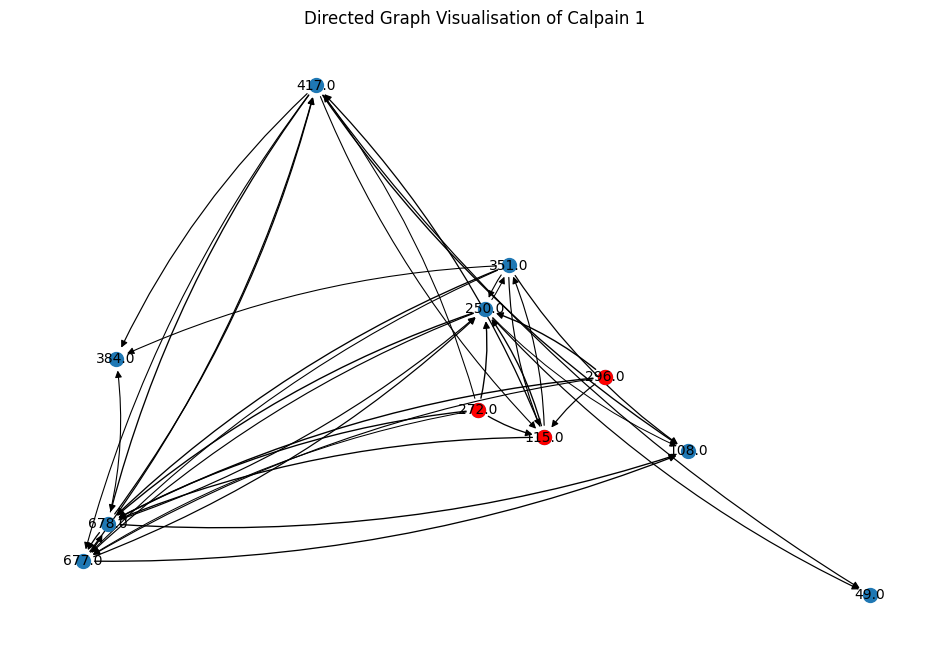

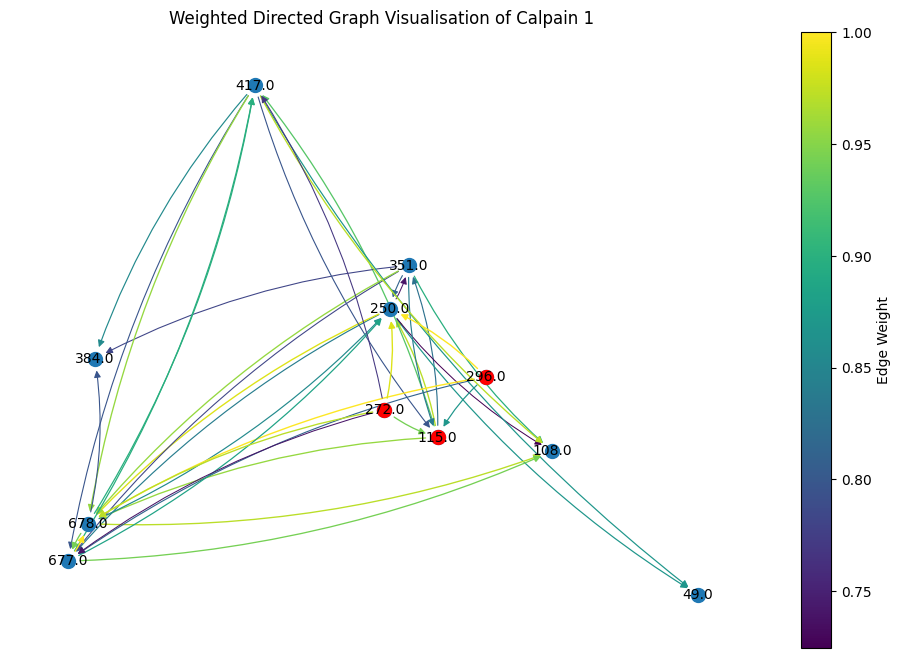

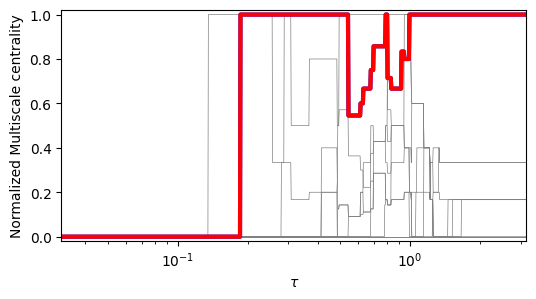

/Users/jrj20/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


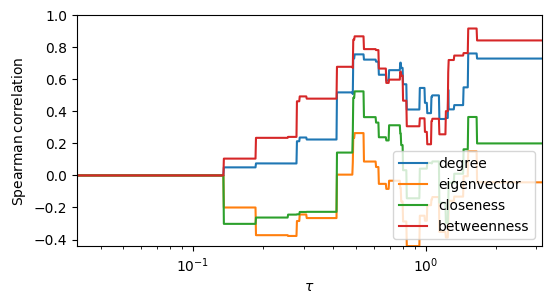

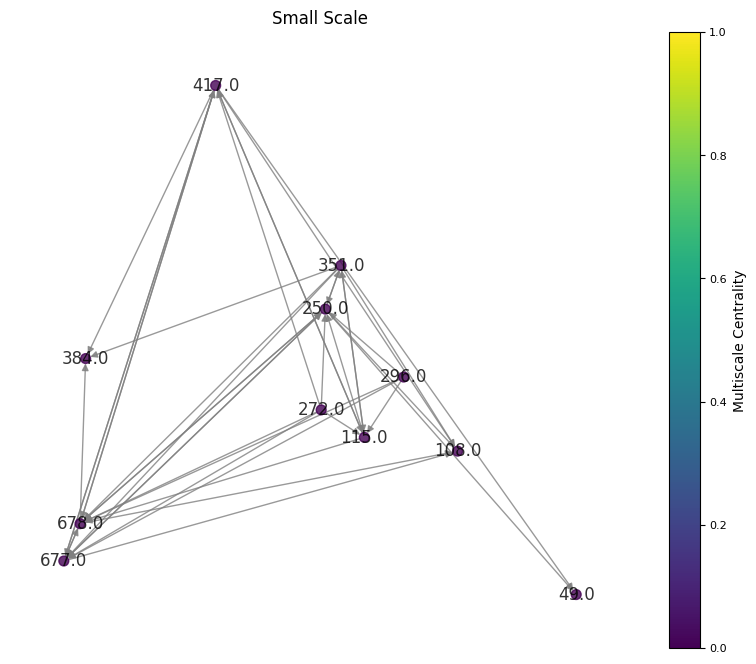

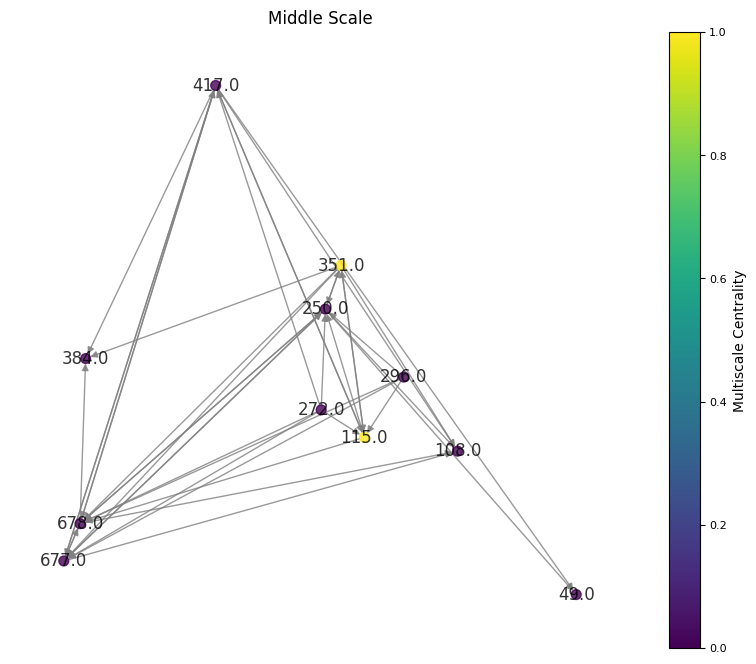

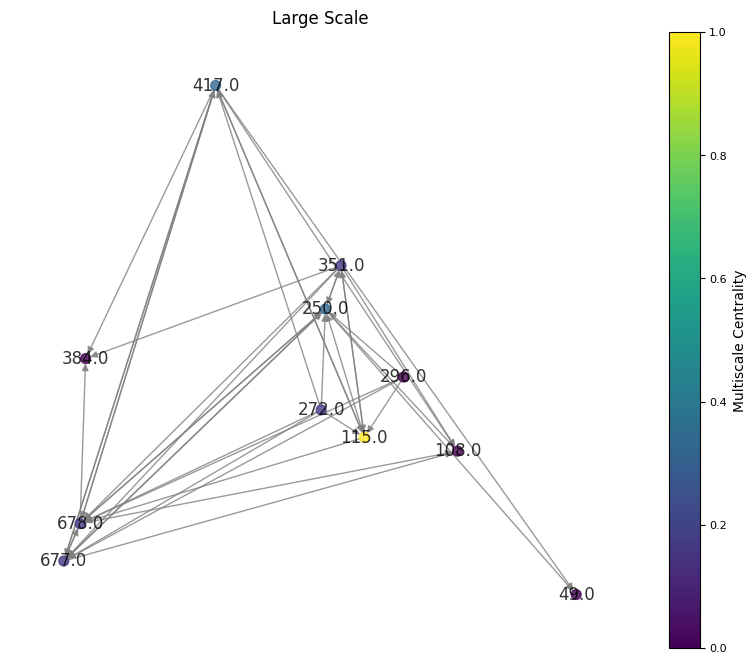

In [23]:
process_files_in_folder(folder_path, file_name_dict, origin_sources, highlight_nodes) #this line of code will trigger it all!!